In [12]:
# Gerekli kütüphaneleri import et
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# Veri setini yükle
data_path = "/Users/mustafacitak/Desktop/Python/ML/ML_Calisma/Student_Performance.csv"
student_data = pd.read_csv(data_path)

# Veri setini incele
print("Veri seti bilgileri:\n", student_data.info())
print("\nEksik değerlerin sayısı:\n", student_data.isna().sum())

# Kategorik değişkenleri dönüştür
label_encoder = LabelEncoder()
student_data["Extracurricular Activities"] = label_encoder.fit_transform(student_data["Extracurricular Activities"])

print("Kategori Etiketleri:")

for label, category in enumerate(label_encoder.classes_):
    print(f"{category}: {label}")
    
    
# Eksik değerleri doldur
#student_data.fillna(student_data.mean(), inplace=True)

# Özellikleri ve hedef değişkeni belirle
X = student_data.drop(columns=["Performance Index"])
y = student_data["Performance Index"]

# Train ve test setlerini oluştur
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modeli oluştur
model = LinearRegression()

# Modeli eğit
model.fit(X_train, y_train)

# Modelin doğruluk oranlarını yazdır
train_accuracy = model.score(X_train, y_train)
test_accuracy = model.score(X_test, y_test)

print("\nEğitim seti doğruluk skoru:", train_accuracy)
print("Test seti doğruluk skoru:", test_accuracy)

# Modelin tahminlerini yap
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Modelin performansını ölç
train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)

train_mae = mean_absolute_error(y_train, y_pred_train)
test_mae = mean_absolute_error(y_test, y_pred_test)

n = len(X_train)
p = X_train.shape[1]
adjusted_r2_train = 1 - (1 - train_accuracy) * (n - 1) / (n - p - 1)
n = len(X_test)
p = X_test.shape[1]
adjusted_r2_test = 1 - (1 - test_accuracy) * (n - 1) / (n - p - 1)

print("Eğitim seti Adjusted R2:", adjusted_r2_train)
print("Test seti Adjusted R2:", adjusted_r2_test)
print("\nEğitim seti MSE:", train_mse)
print("Test seti MSE:", test_mse)
print("\nEğitim seti MAE:", train_mae)
print("Test seti MAE:", test_mae)


# Tahmin yapılacak yeni veriyi oluştur
new_data = {
    "Hours Studied": [5],
    "Previous Scores": [75],
    "Extracurricular Activities": [1],  # yes için 1, no için 0
    "Sleep Hours": [6],
    "Sample Question Papers Practiced": [4]
}
new_data_df = pd.DataFrame(new_data)

# Tahmin yap
predicted_performance = model.predict(new_data_df)

print("Tahmin Edilen Performance Index:", predicted_performance)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB
Veri seti bilgileri:
 None

Eksik değerlerin sayısı:
 Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64
Kategori Etiketleri:
No: 0
Yes

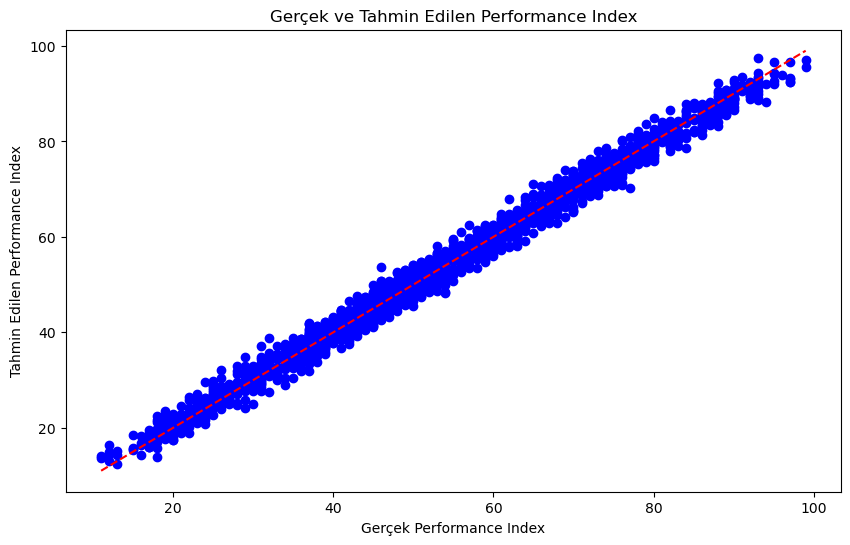

In [13]:
# Görselleştirme
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_test, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')
plt.xlabel("Gerçek Performance Index")
plt.ylabel("Tahmin Edilen Performance Index")
plt.title("Gerçek ve Tahmin Edilen Performance Index")
plt.show()